<h1>機械学習とは</h1>
機械学習をものすごく簡単に説明すると,大量のデータから何かをする方法を自動で作ることと言えます.<br>


<h3>かつての方法の例</h3>
手元にwebサイトの顧客データが大量にあります.<br>
この顧客データから,ユーザが興味があるであろう商品を自動でレコメンドしようという案がでました.<br>
社内の人間（データサイエンティスト）たちがデータから顧客の傾向をまとめ,
（家電カテゴリの商品を３点以上買ったら,〇〇の商品をレコメンド）のようなアルゴリズムを<br>
人間(データサイエンティスト)が考えて組みます.<br>

<h3>機械学習を使うと</h3>
手元にwebサイトの顧客データが大量にあります.<br>
機械学習のモデルを組みます.<br>
データを入れます,<br>
アルゴリズムが出来上がります<br>

機械学習の主な使いどころは（あくまで僕のイメージ）<strong>人間が考えてしてきた業務を自動化</strong>です.<br>
<ul>
    <li>領収書の入力の自動化</li>
    <li>運転の自動化</li>
    <li>画像のタグ付けの自動化</li>
    <li>音声の文章おこしの自動化</li>
    <li>ロボットの制御の自動化</li>
</ul>
などなど<br>

実際のところ機械学習の理論やモデルを作ることは簡単です.<br>
大変なのはデータ集めとそのデータを使える形式（たいていベクトル形式です.）に直すことです.

webなどの顧客データの場合,サイトを運営していればデータは自動で集まるし,<br>
そのデータはおそらく下のような整列されたデータでしょう.<br>
<table>
    <tr><th>登録日</th><th>全購入数</th><th>購入品１のID</th><th>購入品１のカテゴリID</th><th>...</th></tr>
    <tr><td>08/21</td><td>34</td><td>4123410</td><td>13489090</td><td>...</td></tr>
    </table>
このような場合であれば,良いのですが大抵そうはいきません.

<h4>文章の場合</h4>
文章の場合はデータを集めることは簡単です.（電子書籍,Webサイトのデータなど）<br>
しかし,単語の区切りや文章の構成などをベクトル表現に直す方法をうまく考えなければなりません.<br>
<h4>画像の場合</h4>
画像はRGBの整列されたデータなので,ベクトル表現に直すのは簡単です.<br>
しかし,目的（例えば車の運転,業務の作業工程）などは普通に生活していて手に入るものではないので,集めるためのアルゴリズムを<br>
うまく考える必要があります(webのデータを取ってくる方法もありますが,だめなデータが多すぎて,たいていうまく行きません).<br>
<h4>音楽の場合</h4>
音楽は周波数のデジタルだし,世の中にたくさんデータがあるため,簡単にあつめられそうですが.<br>
実際には普通の音楽のでデータ(MP3やWMVなど)は様々な楽器の音が一緒くたに入っているためあまり適しているとは言えません<br>
学習に適しているデータ(MIDIなど)を改めて自分で作る必要があります<br>
（生の音楽データで）

今回は生の文章をベクトルでどのように表現するかについて、説明する.

<h1>テキストデータの処理</h1>

文字列データには大きく分けて４つの種類がある.<br>
<ul>
<li>カテゴリデータ</li>
<li>カテゴリに分類できる自由な文字列</li>
<li>構造化された文字列</li>
<li>テキストデータ</li>
</ul>

<h4>テキストデータの例</h4>
アンケートの入力で「犬についてどう思うか」、ドロップダウンメニューで[好き,嫌い]から選んでもらったデータ<br>
データは決まった値しか取らず整列されている<br>
<h4>カテゴリに分類できる自由な文字列の例</h4>
アンケートの入力で「犬は好きですか,嫌いですか?」という質問を自由記述してもらったデータ<br>
「好き」,「すごく好き」「嫌い」のようにカテゴリで分けやすいデータもあれば,「昔近所にいた犬に噛まれた.一生許さない.」のように自動でカテゴリに分類しづらいデータもある.<br>
そのため「好き」「嫌い」「その他」のように分類するのが一般的<br>
<h4>構造化された文字列の例</h4>
住所,人名,日付など
<h4>テキストデータの例</h4>
ツイート,記事の文章,チャットログ,本のシナリオなど、最も生のデータ.<br>
参考書が海外のものしかないため,生のデータがそのまま使われるが,日本語の場合は生のデータをそのまま使うことはできない.<br>
英語の場合は<br>
I like dog.Because dog is cute.<br>
のように,単語の区切りは空欄で,文の区切りは.(ドット)で区別できる.しかし日本語の場合<br>
私は犬が好きです。犬はかわいいから。<br>
のように単語の区別がかんたんに行えない.<br>
そのため日本語の場合は形態素解析(文章を意味ごとに分ける)が必要になる<br>

<h3>BoWによるテキスト表現</h3>

BoW(Bag of Words)とはテキストデータを特徴量で表現する最も単純な方法のひとつである.<br>
テキストに現れたコーパスの単語をただ数えていくだけの方法である.<br>
単語の順番や章立て,フォーマットなどテキストの持つ構造がほとんど失われる.<br>
そのためBag Of Words(言葉の袋)とよばれる.<br>

例:<br>
コーパス：[犬,猫,魚,好き,嫌い]<br>
テキスト：私は<strong>犬</strong>が<strong>好き</strong>である.<br>
BoW表現：[1,0,0,1,0]<br>

<h3>実際にやってみる</h3>
今回はSMS Spanm collectionを使い,メールがスパムか否かを判別する.

<h3>環境構築</h3>
<a href="https://www.tensorflow.org/install/install_linux#InstallingVirtualenv">tensorflow</a>のインストール
<p> sudo apt-get install python3-pip python3-dev python-virtualenv</p>
<p> pyvenv myvenv(自由な環境名)</p>
<p>仮想環境のactivate</p>
<p> source myvenv/bin/activate</p> 
これでpythonの仮想環境ができました.仮想環境の中でのみpythonコマンドでpython3を起動,pipコマンドでpip3が起動できます.
<p>(myvenv) pip install --upgrade tensorflow </p>
<p>(myvenv) pip install --upgrade https://storage.googleapis.com/tensorflow/linux/cpu/tensorflow-1.3.0-cp35-cp35m-linux_x86_64.whl</p>
(僕の環境はpython3.5.3だったので上のコマンドでできますが,違うバージョンの場合は<br>
https://www.tensorflow.org/install/install_linux#the_url_of_the_tensorflow_python_package
からupgrade以下のパスの正しいものを選択して<br>
ください.pythonのバージョンはpython -Vで確認できます}.)<br>
jupyter notebookで実行すると理解しやすいです.<br>
pip install jupyter[notebook]<br>
jupyter notebookコマンドで起動

その他必要ライブラリのインストール<br>
pip install requests<br>
pip install matplotlib<br>
pip install numpy<br>

In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
import os
import numpy as np
import csv
import requests
import io
import string
from zipfile import ZipFile
from tensorflow.contrib import learn

セッションを始めに定義しておく.<br>
このセッションが最終的に計算グラフを追加していくインスタンスになる<br>

In [2]:
sess = tf.Session()

<h3>学習に使用するデータのパスを定義</h3>

In [3]:
save_file_name = os.path.join('temp','temp_spam_data.csv')
print('学習データのパス:{}'.format(save_file_name))

学習データのパス:temp/temp_spam_data.csv


<h3>学習データが存在しなければダウンロードする</h3>

In [4]:
if not os.path.exists('temp'):
    print('"temp"ディレクトリが存在しません...作成します')
    os.mkdir('temp')

if os.path.isfile(save_file_name):
    print('{}からデータを読み込み,text_dataにlistで追加します.'.format(save_file_name))
    text_data=[]
    with open(save_file_name,'r') as temp_output_file:
        reader = csv.reader(temp_output_file)
        for row in reader:
            text_data.append(row)
else:
    zip_url = 'http://archive.ics.uci.edu/ml/machine-learning-databases/00228/smsspamcollection.zip'
    print('{}が存在しません.{}から学習データをダウンロードします.'.format(save_file_name,zip_url))
    r = requests.get(zip_url)
    print('レスポンスが200なら成功:{}'.format(r))
    print('ダウンロードしたzipの１文字目から30文字目')
    print(r.content[0:30])
    print('zipはbyteで保存されている')
    print('')
    z = ZipFile(io.BytesIO(r.content))
    file = z.read('SMSSpamCollection')
    print('zipファイルを位置文字ずつ読み込みZipFileのread関数で{}読める状態になる'.format(type(file)))
    print('')
    print('0文字目から30文字目は以下の用になっている.')
    print(file[0:30])
    print('スパム判定\\t文章文章文章....\\n')
    print('というふうに保存されているためこれをひとつずつのスパム判別と文章に分け,text_data変数に格納.')
    text_data = file.decode()
    text_data = text_data.encode('ascii',errors='ignore')
    text_data = text_data.decode().split('\n')
    text_data = [x.split('\t') for x in text_data if len(x)>=1]
    print('text_data変数の中身をファイルとして保存.')
    with open(save_file_name,'w') as temp_output_file:
        writer = csv.writer (temp_output_file)
        writer.writerows(text_data)



temp/temp_spam_data.csvからデータを読み込み,text_dataにlistで追加します.


In [5]:
# 学習データとそのラベル（スパムか否か）を変数に格納
texts = [x[1] for x in text_data]
target = [x[0] for x in text_data]

学習データが文字列だと扱いづらいため,<br>
1:spam<br>
0:ham<br>
と変換する

In [6]:

target = [1 if x=='spam' else 0 for x in target]

<h3>テキストの大文字と小文字の区別をなくす.</h3>

In [7]:
print('句読点などの記号の削除は{}と整合をとって判断する'.format(string.punctuation))
texts = [
    ''.join(c for c in x if c not in string.punctuation) for x in texts
]

句読点などの記号の削除は!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~と整合をとって判断する


<h3>次に数字を削除</h3>

In [8]:
tests=[
    ''.join(c for c in x if c not in '0123456789') for x in texts
]

<h3>次に文の最大の長さを決定する(とりあえず０〜５０で)<br>
英語の場合は空白で区切ることで単語数を判断できるが日本語の場合はこの処理の前に<br>
形態素解析が必要になると思われる<br></h3>


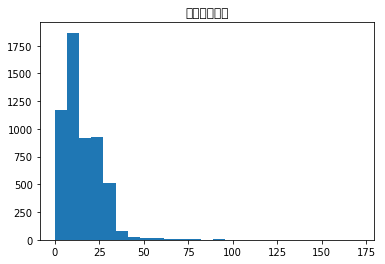

In [9]:
text_lengths = [len(x.split()) for x in texts]
texts_lengths = [x for x in text_lengths if x < 50]
plt.hist(text_lengths,bins=25)
plt.title('ヒストグラム')
plt.show()

<h3>ヒストグラムから一つの文章ごとの単語のカットオフ値（最大値）を25にする<br>
またデータベース全体で3回以上出現しない単語は,打ち間違いやそもそも判別に使うことに適していない単語であると推測できるため,<br>
出現回数３回以上を条件とする.この処理をtensorflowのVocablaryProcessorを用いて行う</h3>

In [10]:
sentence_size = 25
min_word=3

In [11]:
vocab_processor=learn.preprocessing.VocabularyProcessor(max_document_length=sentence_size,min_frequency=min_word)
vocab_processor.fit_transform(tests)
embedding_size = len(vocab_processor.vocabulary_)
print('語彙数は{}'.format(embedding_size))

語彙数は2514


<h3>次にデータを訓練データとテストデータに分ける</h3>
train_indices,text_indicesでデータセットのどこから抜き出すかを定義しする.

In [12]:
train_indices = np.random.choice(len(texts),round(len(texts)*0.8),replace=False)
test_indices = np.array(list(set(range(len(texts))) - set(train_indices)))
print('train_indicesの0から10番目')
print(train_indices[0:10])
print('test_indicesの0から10番目')
print(test_indices[0:10])


train_indicesの0から10番目
[1459 4015 3061  738 2281 2706 1288 4171  876 2364]
test_indicesの0から10番目
[4096 2051    5 2054 4101 4102 4108   13 2063   16]


<h3>定義したindicesからそれぞれtextとラベルを取得する</h3>

In [13]:
texts_train = [x for ix , x in enumerate(texts) if ix in train_indices]
texts_test = [x for ix , x in enumerate(texts) if ix in test_indices]
target_train = [x for ix ,x in enumerate(target) if ix in train_indices]
target_test =[x for ix,x in enumerate(target) if ix in test_indices]

In [14]:
print(target_test[0:5])
print(texts_test[0:5])

[1, 0, 0, 0, 0]
['FreeMsg Hey there darling its been 3 weeks now and no word back Id like some fun you up for it still Tb ok XxX std chgs to send 150 to rcv', 'Ive been searching for the right words to thank you for this breather I promise i wont take your help for granted and will fulfil my promise You have been wonderful and a blessing at all times', 'Oh kim watching here', 'Aft i finish my lunch then i go str down lor Ard 3 smth lor U finish ur lunch already', 'Ffffffffff Alright no way I can meet up with you sooner']


<h3>ある文に出現する単語をベクトルで表現するための行列を定義する.</h3>

In [15]:
identity_mat = tf.diag(tf.ones(shape=[embedding_size]))

<h2>モデルの定義</h2>

tf.Variable(変数)がモデルのグラフとなる初期値をランダムに与える.<br>
入力データ(x_data)と正解データ(y_target)はplaceholder(定数)で定義する<br>
入力データや正解データなどははじめに入れ物だけ定義して,実行時に値を順番に入れていく

In [16]:
A = tf.Variable(tf.random_normal(shape=[embedding_size,1]))
b = tf.Variable(tf.random_normal(shape=[1,1]))
x_data = tf.placeholder(shape=[sentence_size],dtype=tf.int32)
y_target=tf.placeholder(shape=[1,1],dtype=tf.float32)

In [17]:
print(A)
print(b)
print(x_data)
print(y_target)

<tf.Variable 'Variable:0' shape=(2514, 1) dtype=float32_ref>
<tf.Variable 'Variable_1:0' shape=(1, 1) dtype=float32_ref>
Tensor("Placeholder:0", shape=(25,), dtype=int32)
Tensor("Placeholder_1:0", shape=(1, 1), dtype=float32)


<h3>入力の与えられるAはembededing_sizeと同じサイズとなっている.<br>
ある文章に存在する単語の出現状況がベクトルとなり入力されてくるということである<br>
</h3>

In [18]:
x_embed = tf.nn.embedding_lookup(params=identity_mat,ids=x_data)
x_col_sums = tf.reduce_sum(input_tensor=x_embed,axis=0)

In [19]:
print(x_embed)
print(x_col_sums)

Tensor("embedding_lookup:0", shape=(25, 2514), dtype=float32)
Tensor("Sum:0", shape=(2514,), dtype=float32)


<h3>x_col_sums_2D : 文章中の単語を一つの行列であらわしたもの<br>
model_output  : モデルの出力をあらわしたもの.<br></h3>    

In [20]:
x_col_sums_2D = tf.expand_dims(x_col_sums, 0)
model_output = tf.add(tf.matmul(x_col_sums_2D, A), b)
print(x_col_sums_2D)
print(model_output)

Tensor("ExpandDims:0", shape=(1, 2514), dtype=float32)
Tensor("Add:0", shape=(1, 1), dtype=float32)


<h3>loss:出力した値がラベルとどのくらい違うかを表す.学習時に使われる.
prediction:実際の出力,spamかhamかを1か0で出力する.</h3>

In [21]:
loss = tf.reduce_mean(tf.nn.sigmoid_cross_entropy_with_logits(logits=model_output, labels=y_target))
prediction = tf.sigmoid(model_output)

optimaizer（）とtrain_step(訓練回数),initializer(初期化関数)<br>
パラメータ

In [22]:
my_opt = tf.train.GradientDescentOptimizer(0.001)
train_step = my_opt.minimize(loss)

init = tf.global_variables_initializer()

<h3>sessの初期化</h3>

In [23]:
sess.run(init)

<h3>学習</h3>

In [24]:
print('Starting Training Over {} Sentences.'.format(len(texts_train)))
loss_vec = []
train_acc_all = []
train_acc_avg = []
# 
for ix, t in enumerate(vocab_processor.fit_transform(texts_train)):
    #正解データを定義
    y_data = [[target_train[ix]]]
    #sess.runで実行となる.
    #run()の引数が実行されるノードである.
    #train_stepはlossを引数にもち,lossはmodel_putputとy_targetsを...
    #というふうにモデルのすべてが実行されるような形になる.
    #feed_dictはからのplaceholderで定義した入れ物に入れる値
    #x_dataが入力データでy_dataが正解データ
    # _, temp_loss=sess.run(train_step,loss,feed_dict={x_data: t, y_target: y_data})としても良い....はず
    
    sess.run(train_step, feed_dict={x_data: t, y_target: y_data})
    temp_loss = sess.run(loss, feed_dict={x_data: t, y_target: y_data})
    #loss_vecにlossを記録しておく.
    #これは記録しているだけなのであしからず
    #tensorboardというものを使うと便利です.(今回は紹介せず)
    loss_vec.append(temp_loss)
    #10回ごとに何回学習させたかをprint
    if (ix+1)%10==0:
        print('Training Observation #' + str(ix+1) + ': Loss = ' + str(temp_loss))
    #predictionを実行して,これも記録用
    [[temp_pred]] = sess.run(prediction, feed_dict={x_data:t, y_target:y_data})
    
    train_acc_temp = target_train[ix]==np.round(temp_pred)
    train_acc_all.append(train_acc_temp)
    if len(train_acc_all) >= 50:
        train_acc_avg.append(np.mean(train_acc_all[-50:]))

print('Getting Test Set Accuracy For {} Sentences.'.format(len(texts_test)))
test_acc_all = []

Starting Training Over 4459 Sentences.
Training Observation #10: Loss = 5.9777
Training Observation #20: Loss = 12.5425
Training Observation #30: Loss = 0.00100121
Training Observation #40: Loss = 4.35148
Training Observation #50: Loss = 8.97835
Training Observation #60: Loss = 2.00104
Training Observation #70: Loss = 0.312952
Training Observation #80: Loss = 0.0121951
Training Observation #90: Loss = 0.144773
Training Observation #100: Loss = 1.10507
Training Observation #110: Loss = 0.00137555
Training Observation #120: Loss = 0.00709389
Training Observation #130: Loss = 0.260443
Training Observation #140: Loss = 0.900865
Training Observation #150: Loss = 0.108904
Training Observation #160: Loss = 0.00222816
Training Observation #170: Loss = 0.0206201
Training Observation #180: Loss = 1.95726
Training Observation #190: Loss = 1.39074
Training Observation #200: Loss = 0.000350692
Training Observation #210: Loss = 0.702271
Training Observation #220: Loss = 0.00143439
Training Observati

Training Observation #1850: Loss = 0.00287776
Training Observation #1860: Loss = 3.7586
Training Observation #1870: Loss = 0.000165167
Training Observation #1880: Loss = 4.29964
Training Observation #1890: Loss = 0.0248004
Training Observation #1900: Loss = 1.45243
Training Observation #1910: Loss = 0.0101664
Training Observation #1920: Loss = 0.00480969
Training Observation #1930: Loss = 0.0138292
Training Observation #1940: Loss = 0.000156809
Training Observation #1950: Loss = 0.0059588
Training Observation #1960: Loss = 0.00749456
Training Observation #1970: Loss = 1.69679e-06
Training Observation #1980: Loss = 0.000382882
Training Observation #1990: Loss = 0.312279
Training Observation #2000: Loss = 0.0052276
Training Observation #2010: Loss = 0.00134426
Training Observation #2020: Loss = 0.0197222
Training Observation #2030: Loss = 7.59182e-05
Training Observation #2040: Loss = 0.00914761
Training Observation #2050: Loss = 0.000569505
Training Observation #2060: Loss = 0.0167637
T

Training Observation #3660: Loss = 0.00916088
Training Observation #3670: Loss = 0.00274183
Training Observation #3680: Loss = 0.00034307
Training Observation #3690: Loss = 1.68132e-05
Training Observation #3700: Loss = 0.000700482
Training Observation #3710: Loss = 8.90829e-05
Training Observation #3720: Loss = 0.00787085
Training Observation #3730: Loss = 0.218233
Training Observation #3740: Loss = 0.0055334
Training Observation #3750: Loss = 0.275006
Training Observation #3760: Loss = 0.0740217
Training Observation #3770: Loss = 0.104154
Training Observation #3780: Loss = 0.00277074
Training Observation #3790: Loss = 0.0101942
Training Observation #3800: Loss = 0.0459137
Training Observation #3810: Loss = 7.13746
Training Observation #3820: Loss = 0.00134437
Training Observation #3830: Loss = 0.414546
Training Observation #3840: Loss = 0.000343003
Training Observation #3850: Loss = 4.02975
Training Observation #3860: Loss = 0.00022191
Training Observation #3870: Loss = 0.000850995
T

<h3>学習させたモデルでテスト</h3>

Test Observation #50
Test Observation #100
Test Observation #150
Test Observation #200
Test Observation #250
Test Observation #300
Test Observation #350
Test Observation #400
Test Observation #450
Test Observation #500
Test Observation #550
Test Observation #600
Test Observation #650
Test Observation #700
Test Observation #750
Test Observation #800
Test Observation #850
Test Observation #900
Test Observation #950
Test Observation #1000
Test Observation #1050
Test Observation #1100

Overall Test Accuracy: 0.7784753363228699


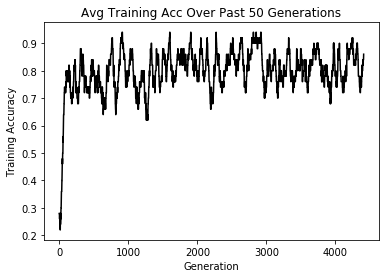

In [25]:

for ix, t in enumerate(vocab_processor.fit_transform(texts_test)):
    y_data = [[target_test[ix]]]
    
    if (ix+1)%50==0:
        print('Test Observation #' + str(ix+1))
        
    [[temp_pred]] = sess.run(prediction, feed_dict={x_data:t, y_target:y_data})
    
    test_acc_temp = target_test[ix]==np.round(temp_pred)
    test_acc_all.append(test_acc_temp)

print('\nOverall Test Accuracy: {}'.format(np.mean(test_acc_all)))

plt.plot(range(len(train_acc_avg)), train_acc_avg, 'k-', label='Train Accuracy')
plt.title('Avg Training Acc Over Past 50 Generations')
plt.xlabel('Generation')
plt.ylabel('Training Accuracy')
plt.show()